In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
%matplotlib inline

In [2]:
# Define a function to return some characteristics of the dataset 
def data_look(fp_list, notfp_list):
    data_dict = {}
    # Define a key in data_dict "n_fps" and store the number of fp images
    data_dict["n_fps"] = len(fp_list)
    # Define a key "n_notfps" and store the number of notfp images
    data_dict["n_notfps"] = len(notfp_list)
    # Read in a test image, either fp or notfp
    fp_img = mpimg.imread(fp_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = fp_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = fp_img.dtype
    # Return data_dict
    return data_dict

In [3]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
    "Shows input images by stacking them in num_cols columns"
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print(figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(cmap == "gray" or cmap == 'hot'):
            ax.imshow(image, cmap=cmap)
        elif(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, cmap=cmap)

    plt.show()

In [4]:
import glob

#Read fps and not-fps images

#Data folders
fishplate_dir =     'C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/'
non_fishplate_dir = 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/'

# images are divided up into fishplate and non-fishplate
fps = []
notfps = []

# Read fishplate images
images = glob.iglob(fishplate_dir + '*.jpg', recursive=True)

for image in images:
        fps.append(image)
        
# Read non-fishplate images
images = glob.iglob(non_fishplate_dir + '*.jpg', recursive=True)

for image in images:
        notfps.append(image)
    
data_info = data_look(fps, notfps)

print('Your function returned a count of', 
      data_info["n_fps"], ' fps and', 
      data_info["n_notfps"], ' nonfps')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 40  fps and 40  nonfps
of size:  (100, 100, 3)  and data type: uint8


Example fp images


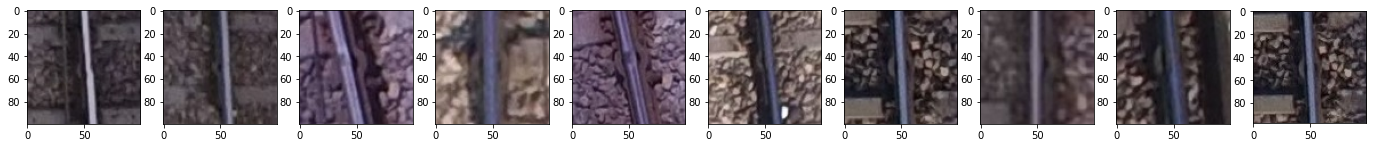

Example not-fp images


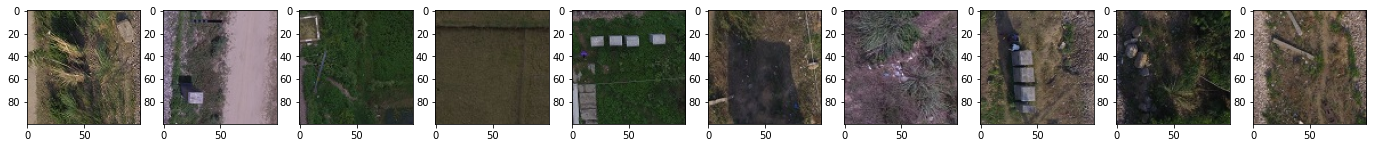

In [5]:
#Visualize some input images
import random

num_images = 10

# Just for fun choose random fp / not-fp indices and plot example images   
fps_samples = random.sample(list(fps), num_images)
notfp_samples = random.sample(list(notfps), num_images)
    
# Read in fp / not-fp images
fp_images = []
notfp_images = []
for sample in fps_samples:
    fp_images.append(mpimg.imread(sample))
    
for sample in notfp_samples:
    notfp_images.append(mpimg.imread(sample))

visualize_images(fp_images, num_images, "Example fp images")
visualize_images(notfp_images, num_images, "Example not-fp images")

Text(0.5, 1.0, 'YUV')

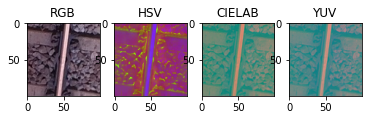

In [6]:
# # Plot the examples
img = cv2.imread('C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/40.jpg')
plt.subplot(141)
plt.imshow(img)
plt.title('RGB')
plt.subplot(142)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
plt.imshow(hsv) 
plt.title('HSV')
plt.subplot(143)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
plt.imshow(lab)
plt.title('CIELAB')
plt.subplot(144)
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plt.imshow(yuv) 
plt.title('YUV')

In [7]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    """
    Return the hog features of the given input image
    Call with two outputs if vis==True"""
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features

Text(0.5, 1.0, 'not fp HOG')

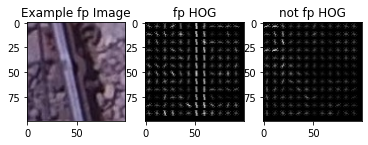

In [8]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

fp_features, hog_image = get_hog_features(cv2.cvtColor(fp_images[1], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

notfp_features, notfp_hog_image = get_hog_features(cv2.cvtColor(notfp_images[2], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

# Plot the examples
fig = plt.figure()
plt.subplot(131)
plt.imshow(fp_images[2])
plt.title('Example fp Image')
plt.subplot(132)
plt.imshow(hog_image, cmap='gray')
plt.title('fp HOG')
plt.subplot(133)
plt.imshow(notfp_hog_image, cmap='gray')
plt.title('not fp HOG')

In [9]:
def bin_spatial(img, size=(16, 16)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [10]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [11]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=False, hist_feat=False, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        image = (image * 255).astype(np.uint8)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)   

            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [12]:
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size=(32, 32)
hist_bins=32

t=time.time()

fp_features = extract_features(fps, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, hist_bins=hist_bins)
notfp_features = extract_features(notfps, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, hist_bins=hist_bins)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((fp_features, notfp_features)).astype(np.float64) 
print(X.shape)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(fp_features)), np.zeros(len(notfp_features))))

print(len(y))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 30)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

#X_train, X_test = shuffle(X_train, y_train, random_state=rand_state)
# # Compute a PCA  on the features 
# n_components = 4932

# print("Extracting the top %d features from %d total features"
#       % (n_components, X_train.shape[1]))

# pca = PCA(n_components=n_components, svd_solver='randomized',
#           whiten=True).fit(X_train)

# X_train_pca = pca.transform(X_train)
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC X_scaler
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

1.44 Seconds to extract HOG features...
(80, 13068)
80
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 13068
0.03 Seconds to train SVC...


In [13]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 6))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  1.0
My SVC predicts:  [1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
For these 10 labels:  [1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
0.00199 Seconds to predict 10 labels with SVC


In [14]:
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256),
                        orient=9,pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    
    for img in imgs:
        image_orig= cv2.imread(img)
        images=[image_orig]
        image_flipped= cv2.flip(image_orig,1)
        images.append(image_flipped)

            
        for image in images:
            feature_image=None
            if color_space != 'RGB':
                if color_space == 'HSV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
                elif color_space == 'LUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
                elif color_space == 'HLS':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
                elif color_space == 'YUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
                elif color_space == 'YCrCb':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
            else: feature_image = np.copy(image) 
            image_feature=[]
            if spatial_feat==True:
                image_feature= image_features(feature_image, color_space, spatial_size) 

            histogram_features=[]
            if hist_feat==True:
                histogram_features= color_hist(feature_image, hist_bins, hist_range)

            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
    #         print(hog_features[0])
    #         features.append(hog_features)
            features.append(np.concatenate((image_feature, histogram_features,hog_features)))

       
    return features

In [15]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
#         print(feature_image)
        
        spatial_features = image_features(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
       
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [16]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5), offset=0):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = (img.shape[0]//2)+offset #(img.shape[0]*2//3)+20
#         print((img.shape[0]//2)-100)
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    window_list = []

    
    scales=[1,1,1.5,1.5]
    ystart=y_start_stop[0]
    for scale in scales:
        over_x= xy_overlap[0]
        over_y= xy_overlap[1]
        width= xy_window[0]*scale
        height= xy_window[1]*scale
        c= y_start_stop[0]
        
        for row in range(2):
            col=0
            endx=0
            image_width= img.shape[1]
            
            while(endx<image_width):
                
                startx = x_start_stop[0]+ col*width*(1-over_x)
                endx = startx + width
                starty = ystart+ row*height*(1-over_y)
                endy = starty + height
                if(endx-startx==endy-starty and endx-startx!=0):
#                     print(endx-startx, endy-starty)
                    window_list.append(((int(startx), int(starty)), (int(endx), int(endy)), width/64.0))
                col+=1
#         y_start_stop[0]-=5    
    return window_list

In [17]:
color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 16  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [300, 500] # Min and max in y to search in slide_window()

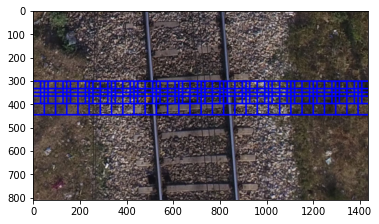

In [18]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

test_image = 'C:/Users/hp/Desktop/Mod1-IITR/test/7.JPG'
feature_image = cv2.imread(test_image)
feature_image = cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB)
plt.imshow(feature_image)
windows = slide_window(feature_image, x_start_stop=[None, None], y_start_stop=y_start_stop)              
window_img = draw_boxes(feature_image, windows, color=(0, 0, 255), thick=6)  
plt.imshow(window_img)
plt.show()

In [19]:
test_image = 'C:/Users/hp/Desktop/Mod1-IITR/test/7.JPG'
IMG = cv2.imread(test_image)

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    out_img = np.copy(img)
    for b in bboxes:
        cv2.rectangle(out_img, *b, color, thick)
    return out_img

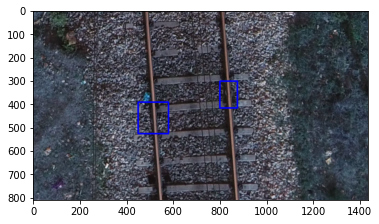

In [20]:
bboxes = [((450,390),(580,525)),((800,300),(875,415))]
plt.imshow(draw_boxes(IMG, bboxes=bboxes));

In [21]:
#-----------------------sliding window

In [22]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    # Create an empty list to receive positive detection windows
    on_windows = []
    # Iterate over all windows in the list
    count = 0
    image_id = random.randint(0, 10)
    for window in windows:
        count += 1
        # Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
#         cv2.imwrite("frames/window%d%d.jpg" % (image_id, count), test_img)
        # Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        # Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        # Predict using your classifier
        prediction = clf.predict(test_features)
        # If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    # Return windows for positive detections
    return on_windows

TypeError: Expected Ptr<cv::UMat> for argument 'src'

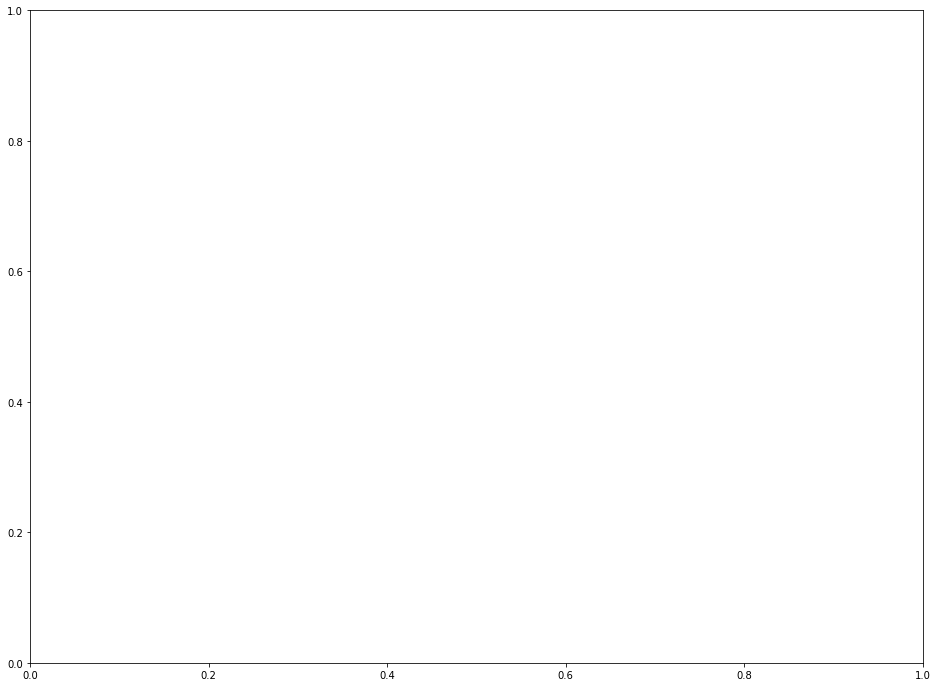

In [23]:
def label_vehicles(image, X_scaler):
    draw_image = np.copy(image)
    draw_image = cv2.cvtColor(draw_image, cv2.COLOR_RGB2BGR)
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop)
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)  
    return window_img

f, axarr = plt.subplots(1, 1, figsize=(16, 12))
startIndex = random.randint(1, 40)
for i in range(7,8):
    index = i + startIndex
    img = cv2.imread('C:/Users/hp/Desktop/Mod1-IITR/test/' + str(index) + '.jpg')
    img_with_label = label_vehicles(img, X_scaler)
    axarr[i].imshow(img_with_label)
plt.setp([a.get_xticklabels() for a in axarr[:]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:]], visible=False)
f.subplots_adjust(hspace=0)
plt.show()